In [1]:
'''
Authors: Daniel M. Low
License: See license in github repository
'''

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

ts = datetime.datetime.utcnow().strftime('%y-%m-%dT%H-%M-%S')

pd.set_option("display.max_columns", None)
# pd.options.display.width = 0


# os.chdir(os.path.dirname(__file__)) # Set working directory to current file

on_colab = False

if on_colab:
  from google.colab import drive
  project_name = 'project_name'
  drive.mount('/content/drive')
  input_dir = f'/content/drive/MyDrive/datum/{project_name}/data/input/reddit/'
  output_dir = f'/content/drive/MyDrive/datum/{project_name}/data/output/'
else:
  input_dir = './data/'
  output_dir = './data/output/'

os.makedirs(output_dir, exist_ok=True)



Feature extraction
- SRL

Models with logistic regression
- 100, 300, 4000

Content validity
- Sensitivity predicting prototypical tokens. 

In [60]:
filename = 'reddit_13_mental_health_4600-posts_20250311_123431'
df = pd.read_csv(f'./data/input/reddit/{filename}.csv')

In [61]:
df['subreddit'].value_counts()

subreddit
SuicideWatch           4600
relationship_advice    4600
depression             4600
selfharm               4600
AskLGBT                4600
bullying               4600
abusesurvivors         4600
GriefSupport           4600
EatingDisorders        4600
lonely                 4600
Anxiety                4600
addiction              4600
sexualassault          4600
Name: count, dtype: int64

# Feature extraction


### Suicide Risk Lexicon

In [62]:
# !pip install -q construct-tracker
# !pip install numpy==1.23.5 spacy==3.5.0
## !python -m spacy download en_core_web_sm 


In [63]:
from construct_tracker import lexicon
srl = lexicon.load_lexicon(name = 'srl_v1-0') # Load lexicon

In [65]:
run_this = False

if run_this:
    
    

    df['title_text'] = df['title_text'].astype(str)

    

    documents = df['title_text'].to_list()

    # Extract
    counts, matches_by_construct, matches_doc2construct, matches_construct2doc = srl.extract(documents, normalize = False)

    counts

extracting... 


100%|██████████| 50/50 [05:05<00:00,  6.12s/it]


In [66]:
save_files = True 


    

if save_files:
    timestamp = datetime.datetime.utcnow().strftime('%y-%m-%dT%H-%M-%S')
    
    # Save csv and dictionaries counts, matches_by_construct, matches_doc2construct, matches_construct2doc
    import json

    counts.to_csv(f'./data/input/reddit/suicide_risk_lexicon_features/{filename}_suicide-risk-lexicon-counts_{timestamp}.csv', index = False)

    # save dictionaries as json
    with open(f'./data/input/reddit/reddit/suicide_risk_lexicon_features/{filename}_suicide-risk-lexicon_matches_by_construct_{timestamp}.json', 'w') as f:    
        json.dump(matches_by_construct, f, indent=4)    

    with open(f'./data/input/reddit/suicide_risk_lexicon_features/{filename}_suicide-risk-lexicon_matches_doc2construct_{timestamp}.json', 'w') as f:    
        json.dump(matches_doc2construct, f, indent=4)           

    with open(f'./data/input/reddit/suicide_risk_lexicon_features/{filename}_suicide-risk-lexicon_matches_construct2doc_{timestamp}.json', 'w') as f:   
        json.dump(matches_construct2doc, f, indent=4)   



# Load data

In [75]:
import pandas as pd
import json


load_descriptives = False

# Path to your data files - update this to match your directory structure
data_path = './data/input/reddit/suicide_risk_lexicon_features/'

# Load the CSV file
file_prefix = 'reddit_13_mental_health_4600-posts_20250311_123431_suicide-risk-lexicon' # reddit_13_mental_health_4600-posts_20250311_123431_suicide-risk-lexicon_matches_doc2construct_25-03-11T19-43-13
load_timestamp = '25-03-14T19-23-42'
counts_csv = f'{data_path}{file_prefix}-counts_{load_timestamp}.csv'

counts = pd.read_csv(counts_csv, engine='python')


if load_descriptives:

    # Load the JSON files
    # 1. Matches by construct
    matches_by_construct_file = f'{data_path}{file_prefix}_matches_by_construct_{load_timestamp}.json'
    with open(matches_by_construct_file, 'r') as f:
        matches_by_construct = json.load(f)

    # 2. Matches document to construct
    matches_doc2construct_file = f'{data_path}{file_prefix}_matches_doc2construct_{load_timestamp}.json'
    with open(matches_doc2construct_file, 'r') as f:
        matches_doc2construct = json.load(f)

    # 3. Matches construct to document
    matches_construct2doc_file = f'{data_path}{file_prefix}_matches_construct2doc_{load_timestamp}.json'
    with open(matches_construct2doc_file, 'r') as f:
        matches_construct2doc = json.load(f)

    # Example: Display the first few rows of the counts dataframe
    print("Counts DataFrame sample:")
    # print(counts.head())

    # Example: Show keys from the first JSON file
    print("\nConstruct types in matches_by_construct:")
    print(list(matches_by_construct.keys()))

    # Example: Check the structure of matches_doc2construct
    print("\nDocument to Construct mapping sample (first entry):")
    if matches_doc2construct:
        first_doc_id = list(matches_doc2construct.keys())[0]
        print(f"Document ID: {first_doc_id}")
        print(f"Matched constructs: {matches_doc2construct[first_doc_id]}")

    # Example: Check the structure of matches_construct2doc
    print("\nConstruct to Document mapping sample (first entry):")
    if matches_construct2doc:
        first_construct = list(matches_construct2doc.keys())[0]
        print(f"Construct: {first_construct}")
        print(f"Matched document count: {len(matches_construct2doc[first_construct])}")

In [76]:
constructs = srl.construct_names.copy()
constructs

['Existential meaninglessness & purposelessness',
 'Depressed mood',
 'Shame, self-disgust, & worthlessness',
 'Emptiness',
 'Other suicidal language',
 'Sleep issues',
 'Fatigue & tired',
 'Panic',
 'Direct self-injury',
 'Physical abuse & violence',
 'Barriers to treatment',
 'Social withdrawal',
 'Active suicidal ideation & suicidal planning',
 'Incarceration',
 'Defeat & feeling like a failure',
 'Anxiety',
 'Alcohol use',
 'Grief & bereavement',
 'Eating disorders',
 'Burdensomeness',
 'Impulsivity',
 'Borderline Personality Disorder',
 'Rumination',
 'Poverty & homelessness',
 'Hopelessness',
 'Physical health issues & disability',
 'Finances & work stress',
 'Mental health treatment',
 'Perfectionism',
 'Other substance use',
 'Lethal means for suicide',
 'Sexual abuse & harassment',
 'Emotional pain & psychache',
 'Passive suicidal ideation',
 'Bullying',
 'Loneliness & isolation',
 'Hospitalization',
 'Relationships & kinship',
 'Entrapment & desire to escape',
 'Trauma & PTSD

# Descriptive statistics

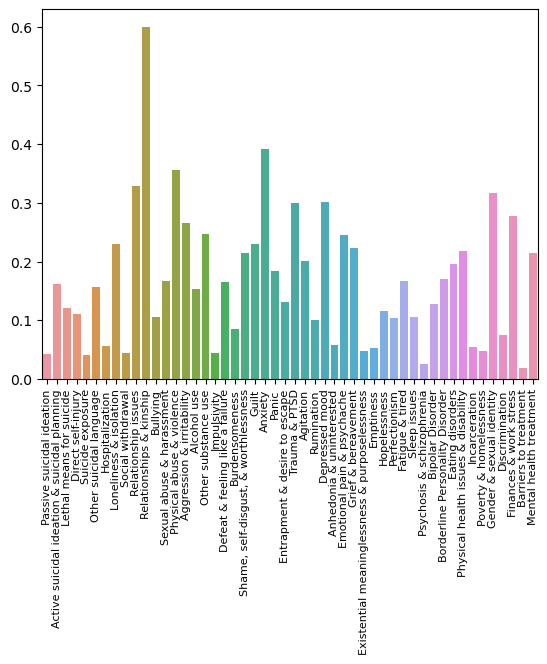

In [77]:
# seaborn bar chart of the proportions
import seaborn as sns
proportions = (counts[constructs]>0).sum()/len(df)
# sort index by constructs list
proportions = proportions.reindex(list(srl.constructs.keys()))

import matplotlib.pyplot as plt
sns.barplot(x=proportions.index, y=proportions.values)
# rotate xticklabels
plt.xticks(rotation=90)
#reduce font size of xtick labels
for item in plt.gca().get_xticklabels():
    item.set_fontsize(8)
plt.show()


# train-test split and binary datasets 

In [78]:
import sys
import os

# Add the directory to sys.path
sys.path.append('./data/input/reddit/')

# Now you can import your script
import reddit_13_mental_health_4600_posts_20250311_123431_train_test_ids as ids

# Use the imported module
train_ids = ids.train_ids
test_ids = ids.test_ids

In [79]:
df = df.rename(columns={'title_text': 'document'})
df['document'] = df['document'].astype(str)
counts['document'] = df['document'].astype(str)

In [80]:
df = df.merge(counts, on='document', how='left')

In [86]:
df.shape[0] - df.drop_duplicates(subset=['document']).shape[0]

0

In [90]:
# Create a train_df and test_df where 4000 of each subreddit are in train_df and 600 of each subreddit are in test_df

# For every subreddit, split into train (4000 posts) and test sets (600 posts)
train_df = pd.DataFrame()
test_df = pd.DataFrame()

for subreddit in df['subreddit'].unique():
    subreddit_df = df[df['subreddit'] == subreddit]
    # Shuffle rows
    subreddit_df = subreddit_df.sample(frac=1, random_state=42).reset_index(drop=True)
    
    # Use concat instead of deprecated append
    train_df = pd.concat([train_df, subreddit_df[:4000]], ignore_index=True)
    test_df = pd.concat([test_df, subreddit_df[4000:4600]], ignore_index=True)

# No need to reset_index again as ignore_index=True in concat already handles this
train_df.to_csv(f'./data/input/reddit/reddit_13_mental_health_4600_posts_20250311_123431_train.csv', index=False)
test_df.to_csv(f'./data/input/reddit/reddit_13_mental_health_4600_posts_20250311_123431_test.csv', index=False)
train_df_ids = train_df['id'].values
test_df_ids = test_df['id'].values

In [93]:
display(train_df['subreddit'].value_counts())
display(test_df['subreddit'].value_counts())

subreddit
SuicideWatch           4000
relationship_advice    4000
depression             4000
selfharm               4000
AskLGBT                4000
bullying               4000
abusesurvivors         4000
GriefSupport           4000
EatingDisorders        4000
lonely                 4000
Anxiety                4000
addiction              4000
sexualassault          4000
Name: count, dtype: int64

subreddit
SuicideWatch           600
relationship_advice    600
depression             600
selfharm               600
AskLGBT                600
bullying               600
abusesurvivors         600
GriefSupport           600
EatingDisorders        600
lonely                 600
Anxiety                600
addiction              600
sexualassault          600
Name: count, dtype: int64

In [103]:




dfs = {}

dfs['train'] = {'srl_validated': train_df}
dfs['test'] = {'srl_validated': test_df}



# Content validity test sets


In [94]:
srl = lexicon.load_lexicon(name = 'srl_v1-0') # Load lexicon
srl_prototypical = lexicon.load_lexicon(name = 'srl_prototypes_v1-0') # Load lexicon
constructs_in_order = list(srl.constructs.keys())

tokens_per_construct = []
for c in constructs_in_order:
	tokens = srl_prototypical.constructs[c]['tokens']
	
	counts, matches_by_construct, matches_doc2construct, matches_construct2doc = srl.extract(tokens, normalize = False)
	counts['y_test'] = c
	tokens_per_construct.append(counts)
	
X_test_3 = pd.concat(tokens_per_construct)

extracting... 


100%|██████████| 50/50 [00:00<00:00, 2833.22it/s]

extracting... 



100%|██████████| 50/50 [00:00<00:00, 1886.15it/s]


extracting... 


100%|██████████| 50/50 [00:00<00:00, 1625.07it/s]


extracting... 


100%|██████████| 50/50 [00:00<00:00, 2350.51it/s]


extracting... 


100%|██████████| 50/50 [00:00<00:00, 3638.68it/s]


extracting... 


100%|██████████| 50/50 [00:00<00:00, 2388.26it/s]


extracting... 


100%|██████████| 50/50 [00:00<00:00, 3181.07it/s]


extracting... 


100%|██████████| 50/50 [00:00<00:00, 1553.96it/s]


extracting... 


100%|██████████| 50/50 [00:00<00:00, 990.96it/s]

extracting... 



100%|██████████| 50/50 [00:00<00:00, 1069.86it/s]


extracting... 


100%|██████████| 50/50 [00:00<00:00, 469.45it/s]


extracting... 


100%|██████████| 50/50 [00:00<00:00, 1418.84it/s]


extracting... 


100%|██████████| 50/50 [00:00<00:00, 1837.64it/s]


extracting... 


100%|██████████| 50/50 [00:00<00:00, 1946.04it/s]


extracting... 


100%|██████████| 50/50 [00:00<00:00, 1864.07it/s]


extracting... 


100%|██████████| 50/50 [00:00<00:00, 1215.33it/s]


extracting... 


100%|██████████| 50/50 [00:00<00:00, 52.04it/s]


extracting... 


100%|██████████| 50/50 [00:00<00:00, 2721.10it/s]


extracting... 


100%|██████████| 50/50 [00:00<00:00, 2411.63it/s]


extracting... 


100%|██████████| 50/50 [00:00<00:00, 1039.48it/s]


extracting... 


100%|██████████| 50/50 [00:00<00:00, 1587.26it/s]


extracting... 


100%|██████████| 50/50 [00:00<00:00, 1710.47it/s]


extracting... 


100%|██████████| 50/50 [00:00<00:00, 2132.94it/s]


extracting... 


100%|██████████| 50/50 [00:00<00:00, 2676.68it/s]


extracting... 


100%|██████████| 50/50 [00:00<00:00, 2009.57it/s]


extracting... 


100%|██████████| 50/50 [00:00<00:00, 2808.67it/s]


extracting... 


100%|██████████| 50/50 [00:00<00:00, 3684.90it/s]


extracting... 


100%|██████████| 50/50 [00:00<00:00, 2129.02it/s]


extracting... 


100%|██████████| 50/50 [00:00<00:00, 2276.02it/s]


extracting... 


100%|██████████| 50/50 [00:00<00:00, 2517.41it/s]


extracting... 


100%|██████████| 50/50 [00:00<00:00, 1217.53it/s]


extracting... 


100%|██████████| 50/50 [00:00<00:00, 1002.46it/s]


extracting... 


100%|██████████| 50/50 [00:00<00:00, 1682.36it/s]


extracting... 


100%|██████████| 50/50 [00:00<00:00, 2500.51it/s]


extracting... 


100%|██████████| 50/50 [00:00<00:00, 2512.19it/s]


extracting... 


100%|██████████| 50/50 [00:00<00:00, 2678.70it/s]


extracting... 


100%|██████████| 50/50 [00:00<00:00, 2077.35it/s]


extracting... 


100%|██████████| 50/50 [00:00<00:00, 2068.18it/s]


extracting... 


100%|██████████| 50/50 [00:00<00:00, 1904.61it/s]


extracting... 


100%|██████████| 50/50 [00:00<00:00, 2750.58it/s]


extracting... 


100%|██████████| 50/50 [00:00<00:00, 3268.37it/s]


extracting... 


100%|██████████| 50/50 [00:00<00:00, 1971.21it/s]


extracting... 


100%|██████████| 50/50 [00:00<00:00, 421.03it/s]


extracting... 


100%|██████████| 50/50 [00:00<00:00, 1492.76it/s]


extracting... 


100%|██████████| 50/50 [00:00<00:00, 1822.55it/s]


extracting... 


100%|██████████| 50/50 [00:00<00:00, 572.74it/s]


extracting... 


100%|██████████| 50/50 [00:00<00:00, 501.12it/s]


extracting... 


100%|██████████| 50/50 [00:00<00:00, 794.67it/s]


extracting... 


100%|██████████| 50/50 [00:00<00:00, 1172.53it/s]


extracting... 


100%|██████████| 50/50 [00:00<00:00, 945.27it/s]


In [98]:
X_test_3

,document_id,document,Passive suicidal ideation,Active suicidal ideation & suicidal planning,Lethal means for suicide,Direct self-injury,Suicide exposure,Other suicidal language,Hospitalization,Loneliness & isolation,Social withdrawal,Relationship issues,Relationships & kinship,Bullying,Sexual abuse & harassment,Physical abuse & violence,Aggression & irritability,Alcohol use,Other substance use,Impulsivity,Defeat & feeling like a failure,Burdensomeness,"Shame, self-disgust, & worthlessness",Guilt,Anxiety,Panic,Entrapment & desire to escape,Trauma & PTSD,Agitation,Rumination,Depressed mood,Anhedonia & uninterested,Emotional pain & psychache,Grief & bereavement,Existential meaninglessness & purposelessness,Emptiness,Hopelessness,Perfectionism,Fatigue & tired,Sleep issues,Psychosis & schizophrenia,Bipolar Disorder,Borderline Personality Disorder,Eating disorders,Physical health issues & disability,Incarceration,Poverty & homelessness,Gender & sexual identity,Discrimination,Finances & work stress,Barriers to treatment,Mental health treatment,word_count,y_test
0,0,I want to die,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,Passive suicidal ideation
1,1,better off dead,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,Passive suicidal ideation
2,2,want to be dead,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,Passive suicidal ideation
3,3,want to die,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,Passive suicidal ideation
4,4,wish I was dead,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,Passive suicidal ideation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,58,stomach pumping,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,Mental health treatment
59,59,support groups,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,Mental health treatment
60,60,therapist,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,Mental health treatment
61,61,therapy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,Mental health treatment


In [104]:
dfs['content_validity'] = {'srl_validated': X_test_3}

In [105]:
# Save dictionary as pickle
import pickle
with open(f'./data/input/reddit/reddit_13_mental_health_4600_posts_20250311_123431_dfs.pkl', 'wb') as f:
    pickle.dump(dfs, f)

# LIWC


In [2]:
train_df = pd.read_csv(f'./data/input/reddit/reddit_13_mental_health_4600_posts_20250311_123431_train.csv')
test_df = pd.read_csv(f'./data/input/reddit/reddit_13_mental_health_4600_posts_20250311_123431_test.csv')

/var/folders/5p/nqv5mzcd5231gj59vw2qybh80000gn/T/ipykernel_39692/836749419.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(f'./data/input/reddit_13_mental_health_4600_posts_20250311_123431_train.csv')


In [4]:
from construct_tracker import lexicon

srl = lexicon.load_lexicon(name = 'srl_v1-0') # Load lexicon
constructs_in_order = list(srl.constructs.keys())


In [ ]:
train_df.drop(constructs_in_order,axis=1).to_csv(f'./data/input/reddit/reddit_13_mental_health_4600_posts_20250311_123431_liwc_train.csv')
test_df.drop(constructs_in_order,axis=1).to_csv(f'./data/input/reddit_13_mental_health_4600_posts_20250311_123431_liwc_test.csv')

Extracted using software

In [26]:
train_df = pd.read_csv(f'./data/input/reddit_13_mental_health_4600_posts_20250311_123431_liwc_train.csv', index_col=0)
test_df = pd.read_csv(f'./data/input/reddit_13_mental_health_4600_posts_20250311_123431_liwc_test.csv', index_col=0)

/var/folders/5p/nqv5mzcd5231gj59vw2qybh80000gn/T/ipykernel_39692/3833829869.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(f'./data/input/reddit_13_mental_health_4600_posts_20250311_123431_liwc_train.csv', index_col=0)


In [ ]:
dfs['train'].update( {'liwc22': train_df})
dfs['test'].update( {'liwc22': test_df})

### LIWC content validity X_test

In [47]:
X_test_3 = dfs['content_validity']['srl_validated'].copy()

In [50]:
srl = lexicon.load_lexicon(name = 'srl_v1-0') # Load lexicon
constructs_in_order = list(srl.constructs.keys())
X_test_3_liwc = X_test_3.drop(constructs_in_order+['word_count'], axis=1)

In [61]:
X_test_3_liwc.to_csv(f'./data/input/srl_prototypical_tokens_content_validity_liwc.csv')

 Ran in LIWC software

In [64]:
X_test_3_liwc_processed =pd.read_csv(f'./data/input/srl_prototypical_tokens_content_validity_liwc.csv')
X_test_3_liwc_processed

,Unnamed: 0,document_id,document,y_test,y_test_reddit,Segment,WC,Analytic,Clout,Authentic,Tone,WPS,BigWords,Dic,Linguistic,function,pronoun,ppron,i,we,you,shehe,they,ipron,det,article,number,prep,auxverb,adverb,conj,negate,verb,adj,quantity,Drives,affiliation,achieve,power,Cognition,allnone,cogproc,insight,cause,discrep,tentat,certitude,differ,memory,Affect,tone_pos,tone_neg,emotion,emo_pos,emo_neg,emo_anx,emo_anger,emo_sad,swear,Social,socbehav,prosocial,polite,conflict,moral,comm,socrefs,family,friend,female,male,Culture,politic,ethnicity,tech,Lifestyle,leisure,home,work,money,relig,Physical,health,illness,wellness,mental,substances,sexual,food,death,need,want,acquire,lack,fulfill,fatigue,reward,risk,curiosity,allure,Perception,attention,motion,space,visual,auditory,feeling,time,focuspast,focuspresent,focusfuture,Conversation,netspeak,assent,nonflu,filler,AllPunc,Period,Comma,QMark,Exclam,Apostro,OtherP,Emoji
0,0,0,I want to die,Passive suicidal ideation,SuicideWatch,1,4,89.52,1.0,1.0,NaN,4,0.0,100.00,100.0,50.00,25.0,25.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,25.00,0.0,0.0,0.0,0.0,50.00,0.00,0.0,0.00,0.0,0.00,0.0,25.00,0.0,25.00,0.0,0.00,25.00,0.0,0.0,0.0,0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,0.0,0.0,0,25.00,0.0,0.0,0,0.0,0.0,0.0,0.0,25.00,0.0,25.00,0.0,0.0,0.0,0,0.0,0.0,0,0.00,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0,0,0,0,0.0,0.0,0
1,1,1,better off dead,Passive suicidal ideation,SuicideWatch,1,3,99.00,NaN,NaN,99.0,3,0.0,100.00,100.0,33.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,33.33,0.0,0.0,0.0,0.0,0.00,66.67,0.0,33.33,0.0,33.33,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0,33.33,33.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,0.0,0.0,0,33.33,0.0,0.0,0,0.0,0.0,0.0,0.0,33.33,0.0,0.00,0.0,0.0,0.0,0,0.0,0.0,0,33.33,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0,0,0,0,0.0,0.0,0
2,2,2,want to be dead,Passive suicidal ideation,SuicideWatch,1,4,89.52,NaN,1.0,NaN,4,0.0,100.00,100.0,50.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,25.00,25.0,0.0,0.0,0.0,50.00,25.00,0.0,0.00,0.0,0.00,0.0,25.00,0.0,25.00,0.0,0.00,25.00,0.0,0.0,0.0,0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,0.0,0.0,0,25.00,0.0,0.0,0,0.0,0.0,0.0,0.0,25.00,0.0,25.00,0.0,0.0,0.0,0,0.0,0.0,0,0.00,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0,0,0,0,0.0,0.0,0
3,3,3,want to die,Passive suicidal ideation,SuicideWatch,1,3,99.00,NaN,1.0,NaN,3,0.0,100.00,100.0,33.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,33.33,0.0,0.0,0.0,0.0,66.67,0.00,0.0,0.00,0.0,0.00,0.0,33.33,0.0,33.33,0.0,0.00,33.33,0.0,0.0,0.0,0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,0.0,0.0,0,33.33,0.0,0.0,0,0.0,0.0,0.0,0.0,33.33,0.0,33.33,0.0,0.0,0.0,0,0.0,0.0,0,0.00,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0,0,0,0,0.0,0.0,0
4,4,4,wish I was dead,Passive suicidal ideation,SuicideWatch,1,4,1.00,1.0,1.0,NaN,4,0.0,100.00,100.0,50.00,25.0,25.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,25.0,0.0,0.0,0.0,50.00,25.00,0.0,0.00,0.0,0.00,0.0,50.00,0.0,25.00,0.0,0.00,25.00,0.0,0.0,0.0,0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0,0.0,0.0,0,25.00,0.0,0.0,0,0.0,0.0,0.0,0.0,25.00,0.0,25.00,0.0,0.0,0.0,0,0.0,0.0,0,0.00,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,25.0,0.0,25.0,0.0,0,0,0.0,0,0.0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [65]:
# dfs['content_validity'] = {
#     'srl_validated':   X_test_3,
#     'liwc22':   X_test_3_liwc_processed}

In [51]:
dfs['content_validity'].update( {'liwc22': X_test_3_liwc})

In [52]:
# # Open dictionary as pickle
# with open(f'./data/input/reddit_13_mental_health_4600_posts_20250311_123431_dfs.pkl', 'rb') as f:
#     dfs = pickle.load(f)

In [66]:
# Save dictionary as pickle
import pickle
with open(f'./data/input/reddit_13_mental_health_4600_posts_20250311_123431_dfs.pkl', 'wb') as f:
    pickle.dump(dfs, f)

# Construct-text similarity

In [68]:
#!/usr/bin/env python
# coding: utf-8

"""
1. Obtain CTS scores using two methods: 1 prototype and multiple prototypes
"""
# !pip install -U spacy
# !python -m spacy download en_core_web_sm

import pandas as pd
import numpy as np
import os
import datetime
import pickle
import seaborn as sns
from construct_tracker import cts
from construct_tracker.utils import stop_words, clean, lemmatizer, stop_words, tokenizer
from construct_tracker import lexicon
from importlib import reload
reload(cts)

<module 'construct_tracker.cts' from '/Users/danielmlow/miniconda3/envs/text_psychometrics/lib/python3.10/site-packages/construct_tracker/cts.py'>

In [69]:
input_dir = './data/input/reddit/'
output_dir = './data/'

task = 'classification'
ts = datetime.datetime.utcnow().strftime('%y-%m-%dT%H-%M-%S') # for saving outputs

In [70]:
# load pickle
with open('./data/input/reddit/reddit_13_mental_health_4600_posts_20250311_123431_dfs.pkl', 'rb') as handle:
	dfs = pickle.load(handle)

In [71]:
srl = lexicon.load_lexicon(name = 'srl_v1-0') # Load lexicon
srl_prototypes = lexicon.load_lexicon(name = 'srl_prototypes_v1-0') # Load lexicon
constructs_in_order = list(srl.constructs.keys())

In [72]:
# config
# ============================================================
construct_representation = 'lexicon'
document_representation = 'clause'
embedding_type = 'sentence'
embedding_model = 'all-MiniLM-L6-v2'

In [73]:
X_test = dfs['test']['srl_validated'].copy()
X_test = X_test.drop(constructs_in_order, axis=1)


In [74]:

srl_mapping = {'self_harm': 'Direct self-injury',
 'suicide': ['Active suicidal ideation & suicidal planning','Passive suicidal ideation','Other suicidal language'],
 'bully': 'Bullying',
 'abuse_sexual': 'Sexual abuse & harassment',
 'bereavement': 'Grief & bereavement',
 'isolated': 'Loneliness & isolation',
 'anxiety': 'Anxiety',
 'depressed': 'Depressed mood',
 'gender': 'Gender & sexual identity',
 'eating': 'Eating disorders',
 'substance': ['Other substance use','Alcohol use']}


single_prototype = {
    'self_harm': ['self harm or self injury'],
    'suicide': ['suicidal thoughts or suicidal behaviors'],
    'bully': ['bullying'],
    'abuse_sexual': ['sexual abuse'],
    'bereavement': ['bereavement or grief'],
    'isolated': ['loneliness or social isolation'],
    'anxiety': ['anxiety'],
    'depressed': ['depression'],
    'gender': ['gender identity'],
    'eating': ['an eating disorder or body image issues'],
    'substance': ['substance use']
}
multiple_prototypes = {}
for k,v in srl_mapping.items():
	if type(v) == str:
		multiple_prototypes[k] = srl_prototypes.constructs[v]['tokens'].copy()
	else:
		multiple_prototypes[k] = []
		for construct in v:
			multiple_prototypes[k].extend(srl_prototypes.constructs[construct]['tokens'])



## Extract CTS on Reddit test set

In [ ]:
import time

documents = X_test['document'].values
# Clean
documents = [n.replace('\n---\n', '. ').replace('. .', '.').replace('?.', '?').replace('? .', '?').replace('!.', '!').replace('! .', '!').replace('....', '...').replace('...', '... ').strip('.').replace('\n', ' ').replace('  ', ' ').replace(" n't", "n't").replace(" 's", "'s").replace(" ’s", "'s").replace(" ’m", "'m").replace(' nt', 'nt').replace(" n’t", "n't").replace(" n’t", "n't").strip(' ').replace(' . ', '. ').replace(' : ', ': ').replace('.,', '.') for n in documents]

feature_vectors_lc_all = []
cosine_scores_docs_lc_all = []
# 4m samples for 7800 reddit posts
for lexicon_dict in [single_prototype, multiple_prototypes]:
	start = time.time()
	feature_vectors_lc, cosine_scores_docs_lc = cts.measure(lexicon_dict,
			documents,
			construct_representation = construct_representation,
			document_representation = document_representation,
			count_if_exact_match = False,
			)
	feature_vectors_lc_all.append(feature_vectors_lc)
	cosine_scores_docs_lc_all.append(cosine_scores_docs_lc)
	end = time.time()
	print(end - start)

In [ ]:
# Extract for content validity test sets
X_test_3 = dfs['content_validity']['srl_validated'].copy()

for lexicon_dict in [single_prototype, multiple_prototypes]:
	start = time.time()
	feature_vectors_lc, cosine_scores_docs_lc = cts.measure(lexicon_dict,
			documents,
			construct_representation = construct_representation,
			document_representation = document_representation,
			count_if_exact_match = False,
			)
	feature_vectors_lc_all.append(feature_vectors_lc)
	cosine_scores_docs_lc_all.append(cosine_scores_docs_lc)
	end = time.time()
	print(end - start)

## Extract CTS on content validity test set

In [75]:
X_test_3 = dfs['content_validity']['srl_validated'].copy()
X_test_3_cts = X_test_3.drop(constructs_in_order, axis=1)

In [76]:
X_test_3_cts

,document_id,document,word_count,y_test,y_test_reddit
0,0,I want to die,4,Passive suicidal ideation,SuicideWatch
1,1,better off dead,3,Passive suicidal ideation,SuicideWatch
2,2,want to be dead,4,Passive suicidal ideation,SuicideWatch
3,3,want to die,3,Passive suicidal ideation,SuicideWatch
4,4,wish I was dead,4,Passive suicidal ideation,SuicideWatch
...,...,...,...,...,...
58,58,stomach pumping,2,Mental health treatment,NaN
59,59,support groups,2,Mental health treatment,NaN
60,60,therapist,1,Mental health treatment,NaN
61,61,therapy,1,Mental health treatment,NaN


In [77]:
# Extract for content validity test sets
documents = X_test_3_cts['document'].values

for lexicon_dict, name in zip([single_prototype, multiple_prototypes], ['single', 'multi']):
	
	feature_vectors_lc, cosine_scores_docs_lc = cts.measure(lexicon_dict,
			documents,
			documents_df = X_test_3_cts,
			construct_representation = construct_representation,
			document_representation = document_representation,
			count_if_exact_match = False,
			)
	# feature_vectors_lc_all.append(feature_vectors_lc)
	# cosine_scores_docs_lc_all.append(cosine_scores_docs_lc)
	feature_vectors_lc.to_csv(f'./data/input/reddit/construct_text_similarity_features/construct_text_similarity_feature_vectors_lc_content_validity_{name}.csv')
	dfs['content_validity'].update({f'ctl_{name}': feature_vectors_lc})
	
	with open(f'./data/input/reddit/construct_text_similarity_features/construct_text_similarity_cosine_scores_docs_lc_content_validity_{name}.pkl', 'wb') as f:
		pickle.dump(cosine_scores_docs_lc, f)
	
	
	

INFO: 
INFO: Loaded existing lexicon token embeddings from: ./data/embeddings/all-MiniLM-L6-v2.pickle
INFO: Default input sequence length for all-MiniLM-L6-v2: 256
INFO: Using default device
INFO: Tokenizing documents...
1523it [00:00, 1864.76it/s]
INFO: Encoding all document tokens...
Encoding batches: 100%|██████████| 1/1 [00:01<00:00,  1.78s/it]
INFO: computing similarity between 11 constructs and 1523 documents...
Processing documents: 1523it [00:02, 613.50it/s]
INFO: 
INFO: Loaded existing lexicon token embeddings from: ./data/embeddings/all-MiniLM-L6-v2.pickle
INFO: Default input sequence length for all-MiniLM-L6-v2: 256
INFO: Using default device
INFO: Tokenizing documents...
1523it [00:00, 2065.89it/s]
INFO: Encoding all document tokens...
Encoding batches: 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]
INFO: computing similarity between 11 constructs and 1523 documents...
Processing documents: 1523it [00:22, 68.59it/s]


In [78]:
# Save dfs as pickle
with open('./data/input/reddit/reddit_13_mental_health_4600_posts_20250311_123431_dfs.pkl', 'wb') as handle:
	pickle.dump(dfs, handle)

